In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"C:\Users\sneha\Downloads\password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(3)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1


In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(["index"], axis=1, inplace=True)

In [9]:
data.head(4)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2


In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
data.duplicated().sum()

0

In [12]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [13]:
data.isnull().any().sum()

0

In [14]:
data.dtypes

password    object
strength     int64
dtype: object

In [15]:
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [16]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [17]:
data['password'][0]

'zxe870819'

In [18]:
type(data['password'][0])

str

In [19]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [20]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [21]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [22]:
data[data["password"].str.isupper()]


,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [23]:
data[data["password"].str.isalpha()].shape


(50, 2)

In [24]:
data[data["password"].str.isalnum()]


,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [25]:
data[data["password"].str.istitle()]


,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [26]:
data["password"]


0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [27]:
import string


In [28]:
string.punctuation ## all punctuations defined in "string" package !


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [30]:
data["password"].apply(find_semantics)==1


0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [31]:
data[data["password"].apply(find_semantics)==1]


,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [32]:
data["password"][0]


'zxe870819'

In [33]:
len(data["password"][0]) 


9

In [34]:
data["length"] = data["password"].str.len() 


In [35]:
password = "Shan99"


In [36]:
[char for char in password if char.islower()]


['h', 'a', 'n']

In [37]:
len([char for char in password if char.islower()])


3

In [38]:
len([char for char in password if char.islower()])/len(password)


0.5

In [39]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()])/len(row)

In [40]:
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [41]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [42]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowercase) , 3)


In [43]:
data["uppercase_freq"] = np.round(data["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(data["password"].apply(freq_numerical_case) , 3)

In [44]:
data.head(3)


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222


In [45]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [46]:
data["special_char_freq"] = np.round(data["password"].apply(freq_special_case) , 3)


In [47]:
data.head(5)


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [48]:
data["special_char_freq"] = data["special_char_freq"]/data["length"] 


In [49]:
data.head(5)


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [50]:
data.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [51]:
data[['length' , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"])


length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [52]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col , 'strength']].groupby(['strength']).agg(["min", "max" , "mean" , "median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [53]:
data.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

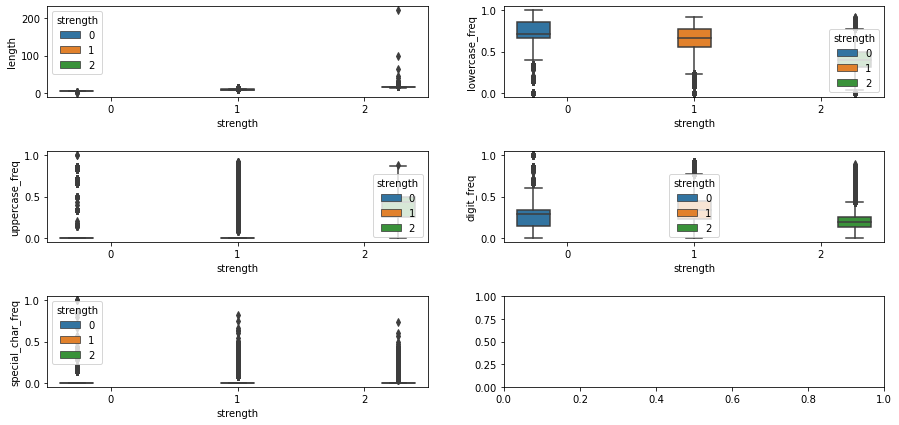

In [54]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='lowercase_freq' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='uppercase_freq' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='digit_freq' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_char_freq' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)


In [55]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [56]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

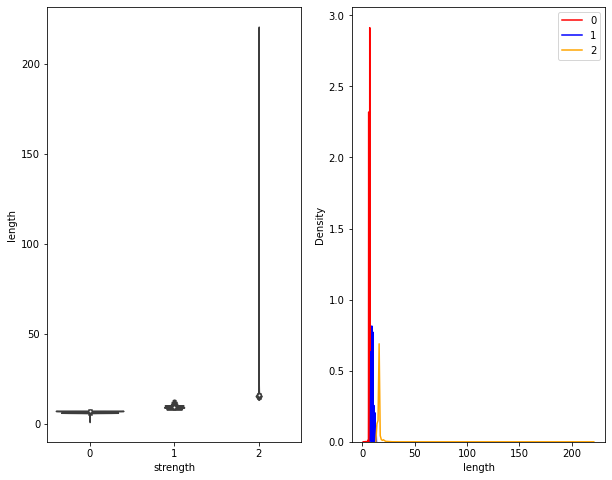

In [57]:
get_dist(data , "length")


In [58]:
data.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

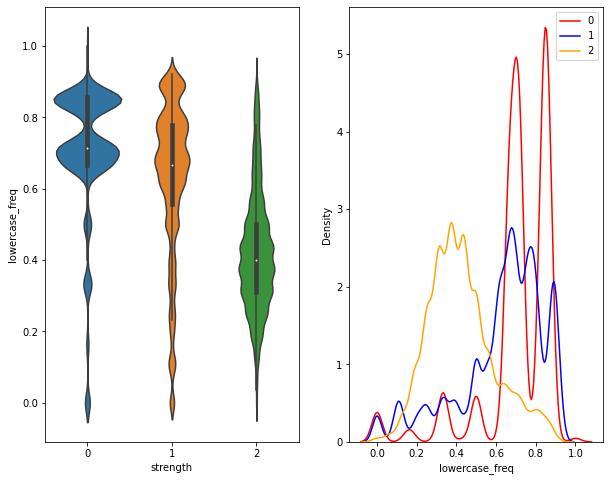

In [59]:
get_dist(data , 'lowercase_freq')


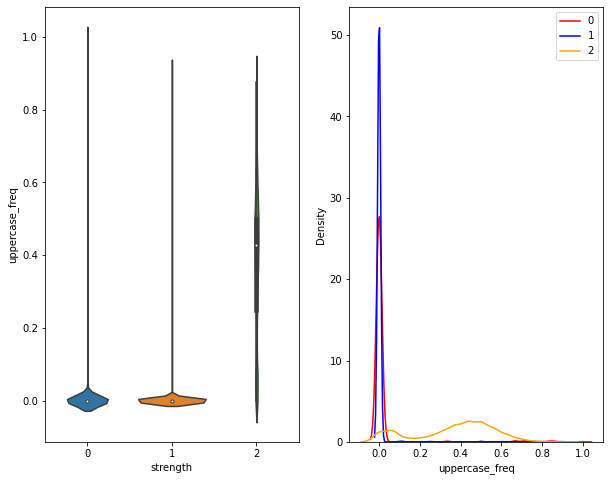

In [60]:
get_dist(data , 'uppercase_freq')


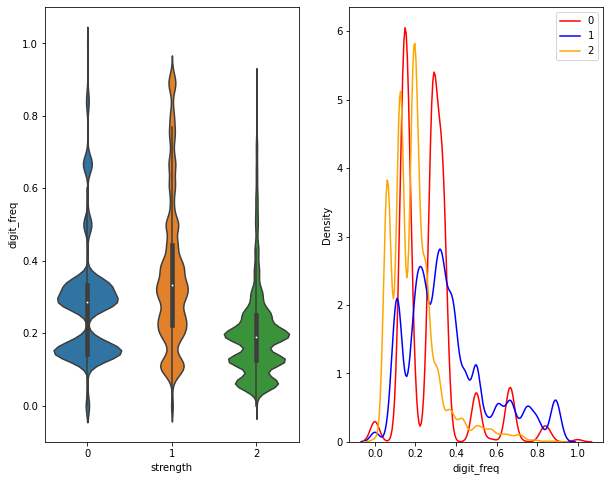

In [61]:
get_dist(data , 'digit_freq')


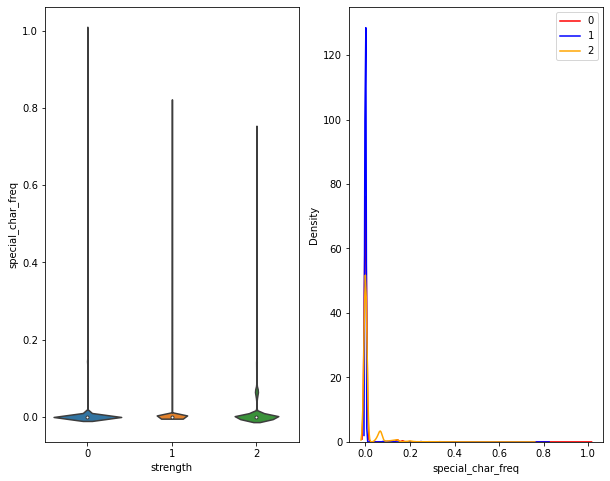

In [62]:
get_dist(data , 'special_char_freq')


In [63]:
data.head(4)


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478


In [64]:
data


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [65]:
dataframe = data.sample(frac=1)


In [66]:
dataframe


,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
54284,gipog482,1,8,0.625,0.000,0.375,0.000000
78759,ogqjzvp58,1,9,0.778,0.000,0.222,0.000000
36411,5bea5ef123,1,10,0.500,0.000,0.500,0.000000
44885,1suck2fuck,1,10,0.800,0.000,0.200,0.000000
24285,xo4pin9ufr,1,10,0.800,0.000,0.200,0.000000
...,...,...,...,...,...,...,...
99064,?}?êO/á,1,8,0.250,0.125,0.000,0.625000
53917,8rivUEDk4MAjXYhh,2,16,0.438,0.438,0.125,0.000000
3669,elb.m.xesvida,1,13,0.846,0.000,0.000,0.153846
10364,n20100,0,6,0.167,0.000,0.833,0.000000


In [67]:
x = list(dataframe["password"])


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [69]:
vectorizer = TfidfVectorizer(analyzer='char')


In [70]:
X = vectorizer.fit_transform(x)


In [71]:
X.shape


(100000, 99)

In [72]:
dataframe["password"].shape


(100000,)

In [73]:
X


<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [74]:
X.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
X.toarray()[0]


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.2576011 , 0.        , 0.31856027,
       0.        , 0.        , 0.        , 0.32595135, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.68074775, 0.        ,
       0.26029397, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26347811, 0.35401354, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
dataframe["password"]


54284            gipog482
78759           ogqjzvp58
36411          5bea5ef123
44885          1suck2fuck
24285          xo4pin9ufr
               ...       
99064            ?}?êO/á
53917    8rivUEDk4MAjXYhh
3669        elb.m.xesvida
10364              n20100
92064           18067932g
Name: password, Length: 100000, dtype: object

In [77]:
len(vectorizer.vocabulary_)


99

In [78]:
vectorizer.vocabulary_

{'g': 48,
 'i': 50,
 'p': 57,
 'o': 56,
 '4': 24,
 '8': 28,
 '2': 22,
 'q': 58,
 'j': 51,
 'z': 67,
 'v': 63,
 '5': 25,
 'b': 43,
 'e': 46,
 'a': 42,
 'f': 47,
 '1': 21,
 '3': 23,
 's': 60,
 'u': 62,
 'c': 44,
 'k': 52,
 'x': 65,
 'n': 55,
 '9': 29,
 'r': 59,
 '6': 26,
 'd': 45,
 '7': 27,
 '0': 20,
 'h': 49,
 't': 61,
 'm': 54,
 'l': 53,
 'w': 64,
 'y': 66,
 '-': 17,
 '<': 31,
 '.': 18,
 '/': 19,
 '#': 9,
 '@': 35,
 '?': 34,
 '_': 40,
 '%': 11,
 '!': 8,
 '*': 15,
 '&': 12,
 ';': 30,
 '$': 10,
 '`': 41,
 '+': 16,
 ']': 38,
 '[': 36,
 '(': 13,
 '^': 39,
 ' ': 7,
 '>': 33,
 'í': 88,
 ')': 14,
 '{': 68,
 '}': 70,
 '~': 71,
 'ç': 85,
 '±': 75,
 'ß': 80,
 '=': 32,
 'ä': 83,
 '°': 74,
 '\\': 37,
 '÷': 93,
 '|': 69,
 'þ': 97,
 '›': 98,
 '³': 76,
 'õ': 91,
 '\x04': 0,
 '\x0e': 3,
 'é': 86,
 '\x06': 1,
 '´': 77,
 '\x10': 4,
 'ý': 96,
 'æ': 84,
 'ö': 92,
 '¡': 72,
 '·': 79,
 'ü': 95,
 '¨': 73,
 'à': 81,
 'ó': 90,
 'µ': 78,
 'ñ': 89,
 '\x11': 5,
 'ú': 94,
 '\x17': 6,
 '\x08': 2,
 'ê': 87,
 'á': 82

In [79]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.vocabulary_)


In [80]:
df2

,g,i,p,o,4,8,2,q,j,z,...,à,ó,µ,ñ,,ú,,,ê,á
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.391761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
dataframe.columns


Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [82]:
df2["length"] = dataframe['length']
df2["lowercase_freq"] = dataframe['lowercase_freq']

In [83]:
df2


,g,i,p,o,4,8,2,q,j,z,...,µ,ñ,,ú,,,ê,á,length,lowercase_freq
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.391761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [84]:
y = dataframe["strength"]


In [85]:
from sklearn.model_selection import train_test_split


In [86]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)


In [87]:
X_train.shape


(80000, 101)

In [88]:
y_train.shape


(80000,)

In [89]:
from sklearn.linear_model import LogisticRegression


In [90]:
clf = LogisticRegression(multi_class="multinomial")


In [91]:
clf.fit(X_train , y_train)


LogisticRegression(multi_class='multinomial')

In [92]:
y_pred = clf.predict(X_test)


In [93]:
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
from collections import Counter


In [95]:
Counter(y_pred)


Counter({1: 17020, 0: 1462, 2: 1518})

In [96]:
password = "%@123abcd"


In [97]:
sample_array = np.array([password])


In [98]:
sample_matrix = vectorizer.transform(sample_array)


In [99]:
sample_matrix.toarray()


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [100]:
sample_matrix.toarray().shape


(1, 99)

In [101]:
password


'%@123abcd'

In [102]:
len(password)


9

In [103]:
[char for char in password if char.islower()]


['a', 'b', 'c', 'd']

In [104]:
len([char for char in password if char.islower()])/len(password)


0.4444444444444444

In [105]:
np.append(sample_matrix.toarray() , (9,0.444)).shape


(101,)

In [106]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [107]:
np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101).shape


(1, 101)

In [108]:
new_matrix = np.append(sample_matrix.toarray() , (9,0.444)).reshape(1,101)


In [109]:
clf.predict(new_matrix)


array([0], dtype=int64)

In [110]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [111]:
predict()


Enter a password : sneha


'Password is weak'

In [112]:
predict()


Enter a password : fgh45@


'Password is weak'

In [113]:
predict()


Enter a password : hnasfjafahy


'Password is weak'

In [114]:
predict()


Enter a password : ngmhh576896#$


'Password is normal'

In [115]:
predict()


Enter a password : vsf587dfj$%vfgh$%eitu5458


'Password is normal'

In [116]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report


In [117]:
accuracy_score(y_test , y_pred)


0.7925

In [118]:
confusion_matrix(y_test , y_pred)


array([[  758,  2016,     3],
       [  641, 13836,   259],
       [   63,  1168,  1256]], dtype=int64)

In [119]:
print(classification_report(y_test , y_pred))


              precision    recall  f1-score   support

           0       0.52      0.27      0.36      2777
           1       0.81      0.94      0.87     14736
           2       0.83      0.51      0.63      2487

    accuracy                           0.79     20000
   macro avg       0.72      0.57      0.62     20000
weighted avg       0.77      0.79      0.77     20000

